# Histograms & Density Plots

In [ ]:
import pandas as pd

tips= pd.read_csv("examples/tips.csv")

tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [ ]:
import seaborn as sns

tips["tip_pct"]=tips["tip"]/(tips["total_bill"]-tips["tip"])

tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


A histogram is a kind of bar plot that gives a discretized display of continuous data

<AxesSubplot:ylabel='Frequency'>

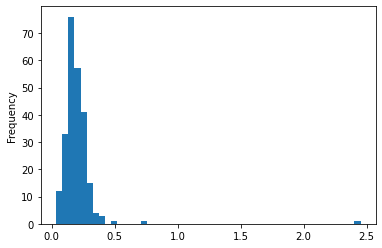

In [ ]:
tips["tip_pct"].plot.hist(bins=50)

<AxesSubplot:ylabel='Density'>

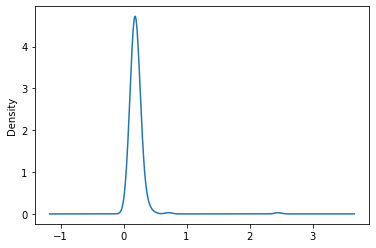

In [ ]:
tips["tip_pct"].plot.density()

# Scatter or Point Plots

In [ ]:
import numpy as np

macro= pd.read_csv("examples/macrodata.csv")

data=macro[["cpi","m1","tbilrate","unemp"]]

trans_data= np.log(data).diff().dropna()

trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


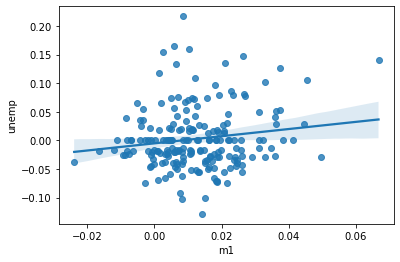

In [ ]:
ax= sns.regplot(x="m1",y="unemp",data=trans_data)

# Pairplot

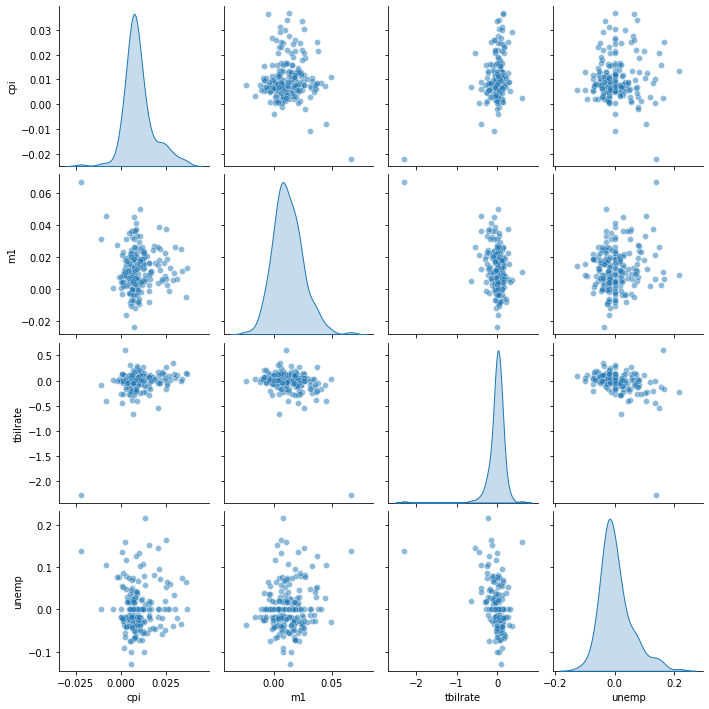

In [ ]:
sns.pairplot(trans_data,diag_kind="kde",plot_kws={"alpha":0.5})

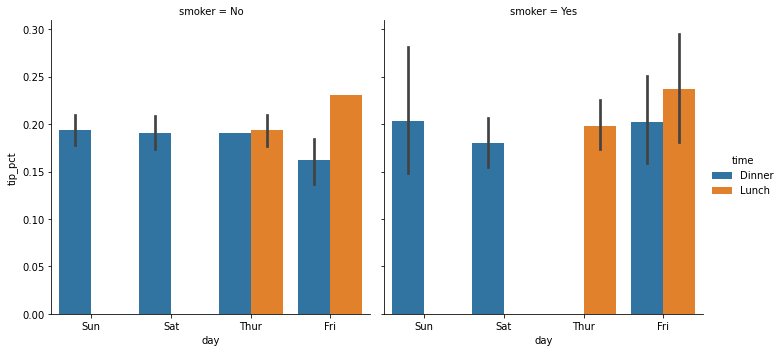

In [ ]:
sns.catplot(x="day",y="tip_pct",hue="time",col="smoker",
           kind="bar",data=tips[tips.tip_pct<1])

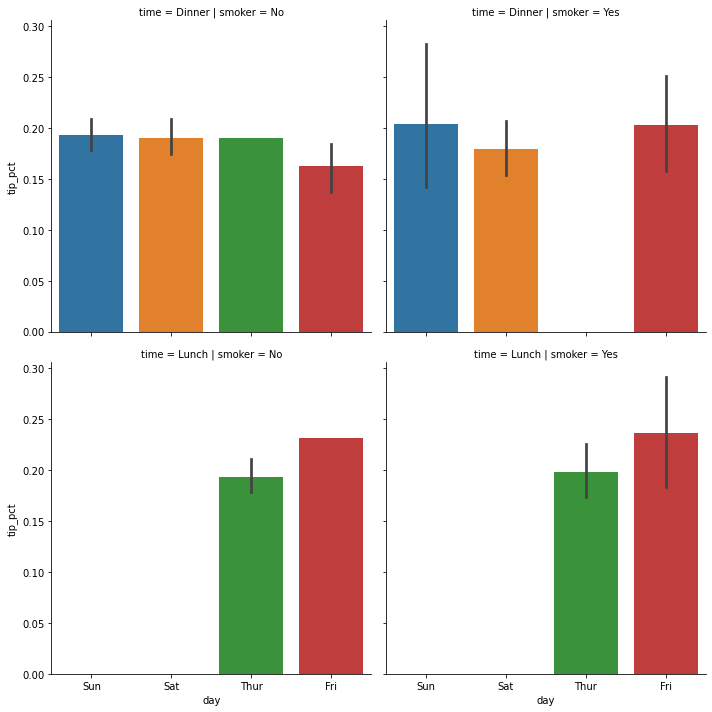

In [ ]:
sns.catplot(x="day",y="tip_pct",row="time",
           col="smoker",
           kind="bar",data=tips[tips.tip_pct<1])

Box Plot explains 5 number theory

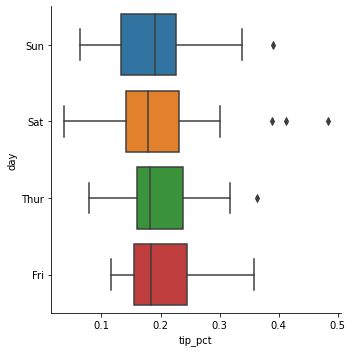

In [ ]:
sns.catplot(x="tip_pct",y="day",kind="box",
           data=tips[tips.tip_pct<0.5])

# Data Aggregation and Group Operations

In [ ]:
df= pd.DataFrame({"key1":["a","a",None,"b","b","a",None],
                 "key2":pd.Series([1,2,1,2,1,None,1],dtype="Int64"),
                 "data1":np.random.standard_normal(7),
                 "data2":np.random.standard_normal(7)})

df

,key1,key2,data1,data2
0,a,1,-0.061262,-1.307427
1,a,2,-0.437937,-1.551648
2,None,1,-0.862067,0.290126
3,b,2,-1.118726,-1.735742
4,b,1,-0.512359,-0.454860
5,a,<NA>,-1.636354,1.019299
6,None,1,-1.270880,1.878699


In [ ]:
grouped=df["data1"].groupby(df["key1"])

grouped

In [ ]:
grouped.mean()

key1
a   -0.711851
b   -0.815542
Name: data1, dtype: float64

In [ ]:
means= df["data1"].groupby([df["key1"],df["key2"]]).mean()
means

key1  key2
a     1      -0.061262
      2      -0.437937
b     1      -0.512359
      2      -1.118726
Name: data1, dtype: float64

In [ ]:
sums= df["data1"].groupby([df["key1"],df["key2"]]).sum()
sums

key1  key2
a     1      -0.061262
      2      -0.437937
b     1      -0.512359
      2      -1.118726
Name: data1, dtype: float64

In [ ]:
sums.unstack()

key2,1,2
key1,,
a,-0.061262,-0.437937
b,-0.512359,-1.118726


In [ ]:
states=np.array(["OH","CA","CA","OH","OH","CA","OH"])

years=[2005,2005,2006,2005,2006,2005,2006]

df["data1"].groupby([states,years]).mean()

CA  2005   -1.037145
    2006   -0.862067
OH  2005   -0.589994
    2006   -0.891620
Name: data1, dtype: float64

In [ ]:
df.groupby("key1").mean()

,key2,data1,data2
key1,,,
a,1.5,-0.711851,-0.613259
b,1.5,-0.815542,-1.095301


In [ ]:
df.groupby("key2").count()

,key1,data1,data2
key2,,,
1,2,4,4
2,2,2,2


In [ ]:
df.groupby(["key1","key2"]).mean()

data1     data2
key1 key2                    
a    1    -0.061262 -1.307427
     2    -0.437937 -1.551648
b    1    -0.512359 -0.454860
     2    -1.118726 -1.735742

In [ ]:
df.groupby("key1",dropna=False).size()

key1
a      3
b      2
NaN    2
dtype: int64

In [ ]:
df.groupby(["key1","key2"],dropna=False).size()

key1  key2
a     1       1
      2       1
      <NA>    1
b     1       1
      2       1
NaN   1       2
dtype: int64

In [ ]:
df.groupby("key1").count()

,key2,data1,data2
key1,,,
a,2,3,3
b,2,2,2


In [ ]:
for name, group in df.groupby("key1"):
    print(name)
    print(group)

a
  key1  key2     data1     data2
0    a     1 -0.061262 -1.307427
1    a     2 -0.437937 -1.551648
5    a  <NA> -1.636354  1.019299
b
  key1  key2     data1     data2
3    b     2 -1.118726 -1.735742
4    b     1 -0.512359 -0.454860


In [ ]:
df.groupby("key1")["data1"].sum()

key1
a   -2.135553
b   -1.631085
Name: data1, dtype: float64

In [ ]:
df.groupby(["key1","key2"])["data2"].mean()

key1  key2
a     1      -1.307427
      2      -1.551648
b     1      -0.454860
      2      -1.735742
Name: data2, dtype: float64

In [ ]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


In [ ]:
tips.groupby(["day","smoker"])["tip_pct"].mean()

day   smoker
Fri   No        0.179740
      Yes       0.216293
Sat   No        0.190412
      Yes       0.179833
Sun   No        0.193617
      Yes       0.322021
Thur  No        0.193424
      Yes       0.198508
Name: tip_pct, dtype: float64

In [ ]:
tips.groupby(["day","smoker"])["tip_pct"].agg("mean")

day   smoker
Fri   No        0.179740
      Yes       0.216293
Sat   No        0.190412
      Yes       0.179833
Sun   No        0.193617
      Yes       0.322021
Thur  No        0.193424
      Yes       0.198508
Name: tip_pct, dtype: float64

In [ ]:
tips.groupby(["day","smoker"])["tip_pct"].agg(["mean","std","count"])

mean       std  count
day  smoker                           
Fri  No      0.179740  0.039458      4
     Yes     0.216293  0.077530     15
Sat  No      0.190412  0.058626     45
     Yes     0.179833  0.089496     42
Sun  No      0.193617  0.060302     57
     Yes     0.322021  0.538061     19
Thur No      0.193424  0.056065     45
     Yes     0.198508  0.057170     17

In [ ]:
tips.groupby(["day","smoker"])["tip_pct"].agg([("average","mean"),("stddev",np.std)])

average    stddev
day  smoker                    
Fri  No      0.179740  0.039458
     Yes     0.216293  0.077530
Sat  No      0.190412  0.058626
     Yes     0.179833  0.089496
Sun  No      0.193617  0.060302
     Yes     0.322021  0.538061
Thur No      0.193424  0.056065
     Yes     0.198508  0.057170

In [ ]:
functions=["count","mean","max"]

result=tips.groupby(["day","smoker"])[["tip_pct","total_bill"]].agg(functions)

result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.179740  0.231125          4  18.420000  22.75
     Yes         15  0.216293  0.357737         15  16.813333  40.17
Sat  No          45  0.190412  0.412409         45  19.661778  48.33
     Yes         42  0.179833  0.483092         42  21.276667  50.81
Sun  No          57  0.193617  0.338101         57  20.506667  48.17
     Yes         19  0.322021  2.452381         19  24.120000  45.35
Thur No          45  0.193424  0.362976         45  17.113111  41.19
     Yes         17  0.198508  0.317965         17  19.190588  43.11

# Data Preprocesing

Data Preprocessing invloves cleaning and engineering data in a way that it can be used as input to several important data science atsks such as data visualization, machine learning, deep learning and data analytics.

Some of the most common data preparation tasks include feature scaling, handling missing values, categorical variable encoding, data discretization.

# Feature Scaling

A dataset can have different attributes. The attributes can have different magnitudes, variances, standard deviation, mean value etc.

For instance, salary can be in thousands, whereas age is normally a two-digit number.

The difference in the scale or magnitude of attributes can actually affect statistical models.

For instance, variables with bigger ranges dominate those woth smaller ranges for linear models.

# Standardization

Standardization is the process of centering a variable at zero and standardizing the data variance to 1.

To standardize a dataset, you simply have to subtract each data point from the mean of all the data points and divide the result by the standard deviation of the data.

Feature Scaling is applied on numeric data only.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
titanic_data= sns.load_dataset("titanic")

titanic_data= titanic_data[["age","fare","pclass"]]

titanic_data.head()

,age,fare,pclass
0,22.0,7.2500,3
1,38.0,71.2833,1
2,26.0,7.9250,3
3,35.0,53.1000,1
4,35.0,8.0500,3


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(titanic_data)

titanic_data_scaled= scaler.transform(titanic_data)

In [ ]:
titanic_data_scaled= pd.DataFrame(titanic_data_scaled, columns=titanic_data.columns)

titanic_data_scaled.head()

,age,fare,pclass
0,-0.530377,-0.502445,0.827377
1,0.571831,0.786845,-1.566107
2,-0.254825,-0.488854,0.827377
3,0.365167,0.420730,-1.566107
4,0.365167,-0.486337,0.827377


<AxesSubplot:xlabel='age', ylabel='Density'>

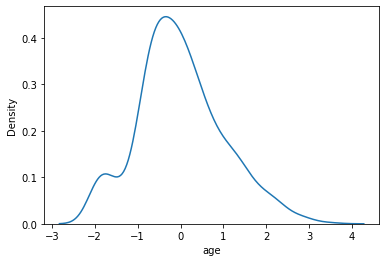

In [ ]:
sns.kdeplot(titanic_data_scaled['age'])

Min/Max Scaling

In min/max scaling you subtract each value by the minimum value and then divide the result by the difference between minimum and maximum value in the dataset.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(titanic_data)

titanic_data_scaled= scaler.transform(titanic_data)

In [ ]:
titanic_data_scaled= pd.DataFrame(titanic_data_scaled, columns=titanic_data.columns)

titanic_data_scaled.head()

,age,fare,pclass
0,0.271174,0.014151,1.0
1,0.472229,0.139136,0.0
2,0.321438,0.015469,1.0
3,0.434531,0.103644,0.0
4,0.434531,0.015713,1.0


<AxesSubplot:xlabel='age', ylabel='Density'>

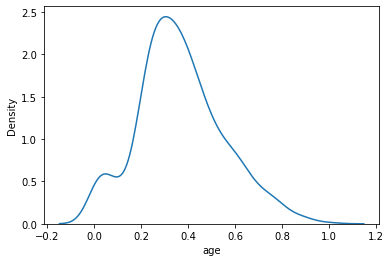

In [ ]:
sns.kdeplot(titanic_data_scaled["age"])

# Handling Missing Data

Missing values are those observations in the dataset that do not contain any value.

Missing values can totally change data patterns and therefore it is extremely important to understand why missing values occur in the dataset and how to handle them.

Handling Missing Numerical Data

To handle missing numerical data, we can use statistical techniques. The use of statistical techniques or algorithms to replace missing values with statistically generated values is called imputation.

In [ ]:
titanic_data= sns.load_dataset("titanic")

titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic_data= titanic_data[["survived","pclass","age","fare"]]

titanic_data.head()

,survived,pclass,age,fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [ ]:
titanic_data.isnull().mean()

survived    0.000000
pclass      0.000000
age         0.198653
fare        0.000000
dtype: float64

In [ ]:
titanic_data.isnull().sum()

survived      0
pclass        0
age         177
fare          0
dtype: int64

In [ ]:
median= titanic_data.age.median()
print(median)

mean=titanic_data.age.mean()
print(mean)

28.0
29.69911764705882


In [ ]:
titanic_data["Median_Age"]=titanic_data.age.fillna(median)

titanic_data['Mean_Age']=titanic_data.age.fillna(mean)

titanic_data['Mean_Age']=np.round(titanic_data['Mean_Age'],1)

titanic_data.head(20)

,survived,pclass,age,fare,Median_Age,Mean_Age
0,0,3,22.0,7.2500,22.0,22.0
1,1,1,38.0,71.2833,38.0,38.0
2,1,3,26.0,7.9250,26.0,26.0
3,1,1,35.0,53.1000,35.0,35.0
4,0,3,35.0,8.0500,35.0,35.0
5,0,3,NaN,8.4583,28.0,29.7
6,0,1,54.0,51.8625,54.0,54.0
7,0,3,2.0,21.0750,2.0,2.0
8,1,3,27.0,11.1333,27.0,27.0
9,1,2,14.0,30.0708,14.0,14.0


Frequent Category Imputation

One of the most common ways of jandling missing values in a categorical column is to replace the missing values with the most frequenly occuring values i.e the mode of the column.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic_data= sns.load_dataset("titanic")

titanic_data= titanic_data[["embark_town","age","fare"]]

titanic_data.head()

,embark_town,age,fare
0,Southampton,22.0,7.2500
1,Cherbourg,38.0,71.2833
2,Southampton,26.0,7.9250
3,Southampton,35.0,53.1000
4,Southampton,35.0,8.0500


In [ ]:
titanic_data.isnull().mean()

embark_town    0.002245
age            0.198653
fare           0.000000
dtype: float64

Text(0, 0.5, 'Number of Passengers')

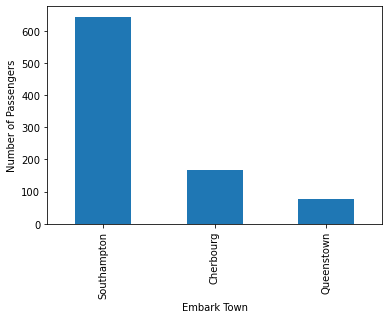

In [ ]:
titanic_data.embark_town.value_counts().sort_values(ascending=False).plot.bar()

plt.xlabel("Embark Town")

plt.ylabel("Number of Passengers")

In [ ]:
titanic_data.embark_town.mode()

0    Southampton
Name: embark_town, dtype: object

In [ ]:
titanic_data.embark_town.fillna('Southampton',inplace=True)

Categorical Data Encoding

Models based on statistical algorithms such as machine learning and deep learning work with numbers.

A dataset can contain numerical, categorical, datetime and mixed variables.

A mechanism is needed to convert categorical data to its numeric counterpart so that the data can be used to build statistical models.

The techniques used to convert numeric data into categorical data are called categorical data encoding schemes.

One Hot Encoding

One Hot Encoding is one of the most commonly used categorical encoding schemes.

In one hot encoding for each unique value in the categorical column a new column is added.

Integer 1 is added to the column that corresponds to original label and all the remaining column are filled with zeros.

In [ ]:
titanic_data=sns.load_dataset("titanic")

titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic_data= titanic_data[["sex","class","embark_town"]]

titanic_data.head()

,sex,class,embark_town
0,male,Third,Southampton
1,female,First,Cherbourg
2,female,Third,Southampton
3,female,First,Southampton
4,male,Third,Southampton


In [ ]:
import pandas as pd

temp= pd.get_dummies(titanic_data['sex'])

temp.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
pd.concat([titanic_data["sex"],pd.get_dummies(titanic_data['sex'])],axis=1).head()

,sex,female,male
0,male,0,1
1,female,1,0
2,female,1,0
3,female,1,0
4,male,0,1


In [ ]:
temp=pd.get_dummies(titanic_data["embark_town"])

temp.head()

,Cherbourg,Queenstown,Southampton
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


Label Encoding

In label encoding, labels are replaced by integers

This is why label encoding is also called as integer encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

le.fit(titanic_data['class'])

titanic_data['le_class']=le.transform(titanic_data['class'])

titanic_data.head()

,sex,class,embark_town,le_class
0,male,Third,Southampton,2
1,female,First,Cherbourg,0
2,female,Third,Southampton,2
3,female,First,Southampton,0
4,male,Third,Southampton,2


Data Discretization

The process of converting continuous numeric values such as price, age and weight into discrete intervals is called discretization or binning.

Discretization is particularly helpful in cases where you have a skewed distribution of data.

Equal Width Discretization

The most common type of discretization approach is fixed width discretization.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

diamond_data= sns.load_dataset("diamonds")

diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot:xlabel='price', ylabel='Density'>

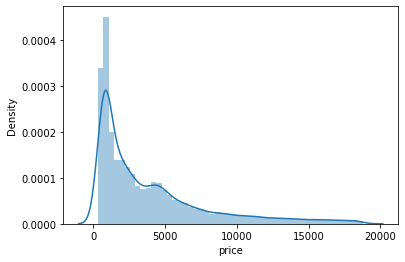

In [ ]:
sns.distplot(diamond_data['price'])

The histogram for price column shows that the data is positively skewed.

In [ ]:
price_range=diamond_data['price'].max()-diamond_data['price'].min()

print(price_range)

18497


In [ ]:
price_range/10

1849.7

In [ ]:
lower_interval= int(np.floor(diamond_data['price'].min()))

upper_interval= int(np.ceil(diamond_data['price'].max()))

interval_length= int(np.round(price_range/10))

print(lower_interval)
print(upper_interval)
print(interval_length)

326
18823
1850


In [ ]:
total_bins=[i for i in range(lower_interval, upper_interval+interval_length, interval_length)]

print(total_bins)

[326, 2176, 4026, 5876, 7726, 9576, 11426, 13276, 15126, 16976, 18826]


In [ ]:
bin_labels= ['Bin_no_'+str(i) for i in range(1,len(total_bins))]

print(bin_labels)

['Bin_no_1', 'Bin_no_2', 'Bin_no_3', 'Bin_no_4', 'Bin_no_5', 'Bin_no_6', 'Bin_no_7', 'Bin_no_8', 'Bin_no_9', 'Bin_no_10']


In [ ]:
diamond_data['price_bins']=pd.cut(x=diamond_data['price'],bins=total_bins,
                                labels=bin_labels, include_lowest=True)

diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_bins
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Bin_no_1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Bin_no_1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Bin_no_1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Bin_no_1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Bin_no_1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bin_no_1'),
  Text(1, 0, 'Bin_no_2'),
  Text(2, 0, 'Bin_no_3'),
  Text(3, 0, 'Bin_no_4'),
  Text(4, 0, 'Bin_no_5'),
  Text(5, 0, 'Bin_no_6'),
  Text(6, 0, 'Bin_no_7'),
  Text(7, 0, 'Bin_no_8'),
  Text(8, 0, 'Bin_no_9'),
  Text(9, 0, 'Bin_no_10')])

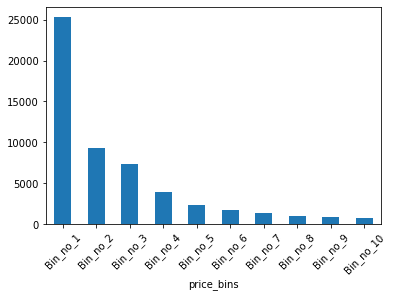

In [ ]:
diamond_data.groupby('price_bins')['price'].count().plot.bar()

plt.xticks(rotation=45)

The output shows that the price of most of the diamonds lies in the first bin or the first interval

Handling Outliers

Outliers are the values that are too far from the rest of the observations.

Outlier Trimming

As the name suggests it refers to simply removing the outliers beyond a certain threshold value.

One of the main advantages of outlier trimming is that it is extremely quick and doesn't distort the data.

In [ ]:
titanic_data= sns.load_dataset("titanic")

titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:ylabel='age'>

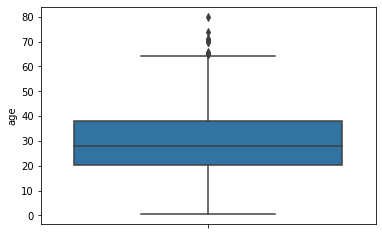

In [ ]:
sns.boxplot(y="age",data=titanic_data)

One of the most common ways to remove the outliers is to find the Inter Quartile Range (IQR), multiply it by 1.5 and then subtract it from the first quartile value(0.25 quantile).

To find the upper limit, add the product of IQR and 1.5 to the 3rd quartile value (0.75 quantile)

In [ ]:
IQR= titanic_data["age"].quantile(0.75)-titanic_data["age"].quantile(0.25)

lower_age_limit= titanic_data["age"].quantile(0.25)-(IQR*1.5)

upper_age_limit= titanic_data["age"].quantile(0.75)+(IQR*1.5)

print(lower_age_limit)

print(upper_age_limit)

-6.6875
64.8125


In [ ]:
age_outliers= np.where(titanic_data["age"]>upper_age_limit,True,np.where(titanic_data["age"]<lower_age_limit,True,False))

In [ ]:
titanic_without_age_outliers= titanic_data.loc[~(age_outliers),]

titanic_data.shape, titanic_without_age_outliers.shape

((891, 15), (880, 15))

<AxesSubplot:ylabel='age'>

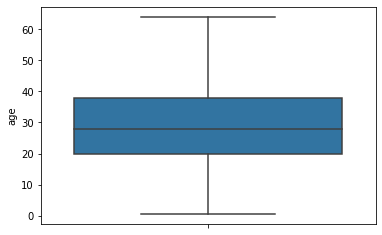

In [ ]:
sns.boxplot(y='age',data=titanic_without_age_outliers)

Feature Selection

Machine Learning algorithms learn from datasets. A dataset consists of features.

A feature refers to a single characteristic or dimension of data. Features are also known as attributes.

For instance, a dataset of cars has features like car models, car color, seating capacity etc.

Selecting the right featuresnot only improves the performance of your machine laerning model but it also speeds up the training time of your algorithm.

Feature Selection based on Variance

Features having constant or very similar values do not really play any sgnificant role in machine learning tasks such as classification and regression.

Therefore, features that are very similar should be removed from the dataset. There are various ways to remove very similar features from the dataset.

One of the ways is to find the variance for a particular feature and remove features having variance less than a certain threshold.

A feature with low variance has a higher degree of similarity among its data points and vice-versa.

In [ ]:
import pandas as pd
import numpy as np

wine_data=pd.read_csv("winequality-red.csv")

wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Dividing data into features and labels

In [ ]:
features=wine_data.drop(["quality"],axis=1)

labels=wine_data.filter(["quality"],axis=1)

In [ ]:
features.var()

fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
dtype: float64

Filtering features based on threshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold

var_sel= VarianceThreshold(threshold=(0.1))

var_sel.fit(features)

VarianceThreshold(threshold=0.1)

In [ ]:
attributes_to_retain= features.columns[var_sel.get_support()]

attributes_to_retain

Index(['fixed acidity', 'residual sugar', 'free sulfur dioxide',
       'total sulfur dioxide', 'alcohol'],
      dtype='object')

In [ ]:
attributes_to_filter=[attr for attr in features.columns
                     if attr not in features.columns[var_sel.get_support()]]

attributes_to_filter

['volatile acidity', 'citric acid', 'chlorides', 'density', 'pH', 'sulphates']

In [ ]:
filtered_dataset= features.drop(attributes_to_filter, axis=1)

filtered_dataset.head()

,fixed acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,alcohol
0,7.4,1.9,11.0,34.0,9.4
1,7.8,2.6,25.0,67.0,9.8
2,7.8,2.3,15.0,54.0,9.8
3,11.2,1.9,17.0,60.0,9.8
4,7.4,1.9,11.0,34.0,9.4


Feature Selection based on correlation

In feature selection based on correlation, the features are selected using the following steps

1 Mutual correlation between all the features is calculated

2 The correlation threshold is set

3 Features having mutual correlation greater than the correlation threshold with any other feature are removed from the dataset.

In [ ]:
correlation_matrix= features.corr()
correlation_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


<AxesSubplot:>

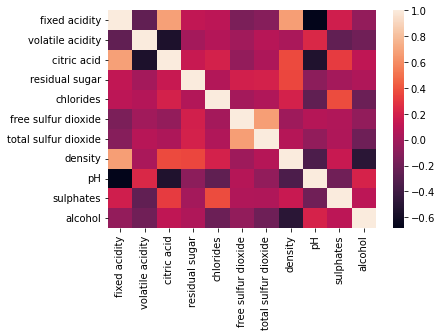

In [ ]:
import seaborn as sns

sns.heatmap(correlation_matrix)

In [ ]:
correlated_features_matrix=set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j])>0.6:
            corr_col= correlation_matrix.columns[i]
            correlated_features_matrix.add(corr_col)

In [ ]:
len(correlated_features_matrix)

4

In [ ]:
print(correlated_features_matrix)

{'total sulfur dioxide', 'pH', 'citric acid', 'density'}


In [ ]:
filtered_dataset= features.drop(correlated_features_matrix, axis=1)

filtered_dataset.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,sulphates,alcohol
0,7.4,0.70,1.9,0.076,11.0,0.56,9.4
1,7.8,0.88,2.6,0.098,25.0,0.68,9.8
2,7.8,0.76,2.3,0.092,15.0,0.65,9.8
3,11.2,0.28,1.9,0.075,17.0,0.58,9.8
4,7.4,0.70,1.9,0.076,11.0,0.56,9.4
